# Business case - Create a predictive model with implementation of  different classifiers on liver patient diseases dataset to predict liver diseases

# 1 . Python Implementation

In [1]:
import numpy as np                    # import numpy library  for numerical calculation
import pandas as pd                   # import pandas library  for reading the data  
import matplotlib.pyplot as plt       # import matplotlib library   for ploting graphs
import seaborn as sns                 # import seaborn library   for data visualisition
%matplotlib inline                    

In [2]:
# for ignoring warnings import warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load The Data and Read the Data
data = pd.read_csv("Indian_Liver_Patient_Dataset.csv")

In [4]:
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_phosphate,Alamine_Aminotransferace,Aspartate_Amino,Protien,Albumin,Albumin_Globulin_ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


#  2 . Domain Analysis

**Age :**  Age is the Age of the Patient in Year

**Gender :** Gender is the sex of Patient

**Total Bilirubin:** Bilirubin is a yellow pigment produced during the breakdown of red blood cells. Elevated levels of total bilirubin in the blood can indicate liver problems.

**Direct Bilirubin:** Direct bilirubin refers to the conjugated form of bilirubin that is excreted from the liver into the bile. Elevated levels of direct bilirubin can be an indication of liver diseases or bile duct obstruction.

**Alkaline Phosphatase:** Alkaline phosphatase (ALP) is an enzyme . Elevated levels of ALP in the blood can indicate liver disorders.

**Alamine Aminotransferase (ALT):** ALT is an enzyme found primarily in the liver. Increased levels of ALT can indicate liver damage .

**Aspartate Aminotransferase (AST):** AST is an enzyme . Elevated levels of AST can indicate liver damage, heart problems, or muscle injury.

**Total Proteins:** Total proteins refer to the total amount of proteins present in the blood, including albumin and globulins. Abnorml levels of total proteins can indicate various medical conditions, including liver or kidney diseases.

**Albumin:** Albumin is a protein synthesized by the liver. Low levels of albumin in the blood can be indicative of liver disease or malnutrition.

**Albumin and Globulin Ratio:** The albumin and globulin ratio is calculated by dividing the albumin level by the globulin level. This ratio can provide additional information about liver function .

**Target :**  The patient have Liver Disease or not.

#  3 . Basic Checks

In [5]:
#  TO see first Five rows
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_phosphate,Alamine_Aminotransferace,Aspartate_Amino,Protien,Albumin,Albumin_Globulin_ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [6]:
# TO see last five rows
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_phosphate,Alamine_Aminotransferace,Aspartate_Amino,Protien,Albumin,Albumin_Globulin_ratio,Target
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [7]:
# information about the data type and null value
data.info()

# Only  in Albumin_Globulin_ratio   has 4 missing  values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       583 non-null    int64  
 1   Gender                    583 non-null    object 
 2   Total_Bilirubin           583 non-null    float64
 3   Direct_Bilirubin          583 non-null    float64
 4   Alkaline_phosphate        583 non-null    int64  
 5   Alamine_Aminotransferace  583 non-null    int64  
 6   Aspartate_Amino           583 non-null    int64  
 7   Protien                   583 non-null    float64
 8   Albumin                   583 non-null    float64
 9   Albumin_Globulin_ratio    579 non-null    float64
 10  Target                    583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [8]:
# To know Statistical Information like mean,standard deviation etc.
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_phosphate,Alamine_Aminotransferace,Aspartate_Amino,Protien,Albumin,Albumin_Globulin_ratio,Target
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


**Insights :-**   

            - Alkaline_phosphate , Alamine_Amino , Asperate_Amino  have outlier
            
            - and in Age & Toatal_Bilirubin have some little bit outlier


#  4 . Exploratory Data Analysis

## i .  Univariate Analysis

In [9]:
# changing the output into yes or no
data.loc[data['Target']==1,'Target'] = 1       # ' 1 ' means having Liver disease
data.loc[data['Target']==2,'Target'] = 0       # ' 0 ' means having No liver disease

In [10]:
# Creating Contineous data variable
data1 = data.drop(['Gender','Target'],axis=1)  # drop Gender & Target

In [11]:
# To see first five rows of contineous data type
data1.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_phosphate,Alamine_Aminotransferace,Aspartate_Amino,Protien,Albumin,Albumin_Globulin_ratio
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40


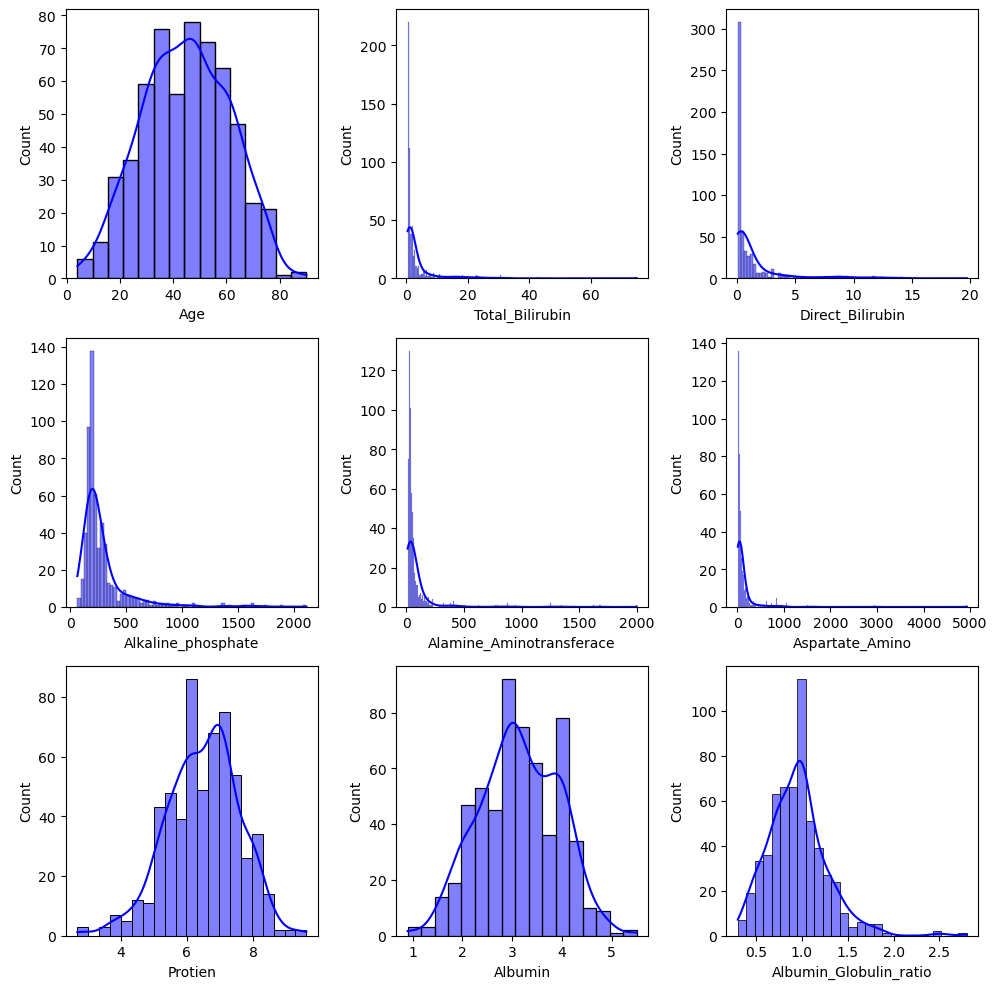

In [12]:
# univariate analysis of numerical data

plt.figure(figsize=(10,10))                             # setting canvas size
plotnumber = 1                                          # create a variable Plotnumber
for i in data1:                                         # using for loop to iterate
    plt.subplot(3,3,plotnumber)                         # setting plots no of row and column
    sns.histplot(x = data[i],kde = True,color='blue')   # using hist plot to see the distribution
    plotnumber = plotnumber + 1                         # Define the plot number
plt.tight_layout()                                      # to avoid overlaping

 ** Insights -**
 
 
               - Age ,Protien , Albumin have normal distribution
               - Total_Bilirubin , Direct_Bilirubin , Alkaline_phosphate , alamine_AminoTransferese , Asparate_Amino have                                             positive Skewness .
               - Albumin_Globulin_ratio have little positive skewness

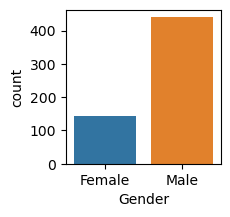

In [13]:
# univariate analysis of categorical data

plt.figure(figsize=(2,2))         # canvas size
sns.countplot(x=data.Gender)      # ploting countplot
plt.show()

# - we can clearly see that data has not Balanced , males are more in count as compared female.

##  ii . Bi-Variate Analysis

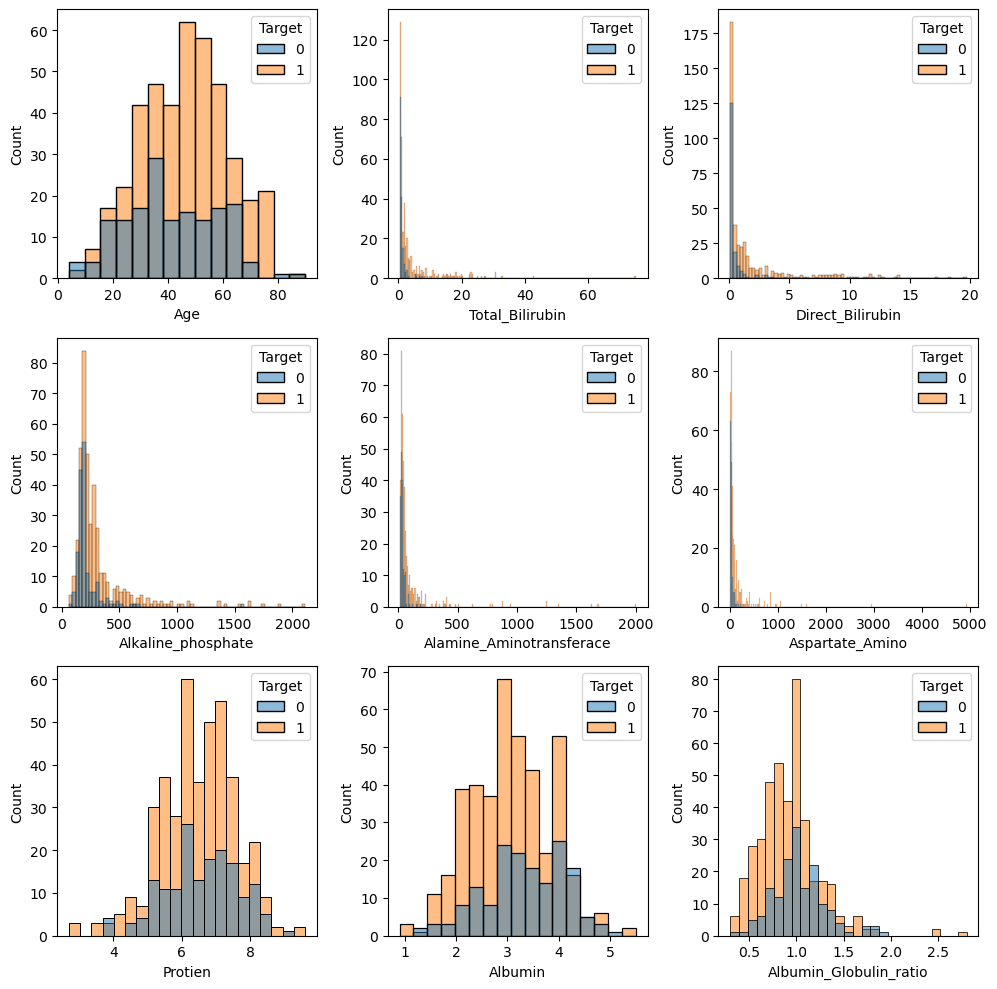

In [14]:
# Bi-variate analysis of Numerical data

plt.figure(figsize=(10,10))                          # setting canvas size
plotnumber = 1                                       # create variable
for i in data1:                                      # using for loop to iterarte
    plt.subplot(3,3,plotnumber)                      # inserting multiple plots
    sns.histplot(x = data1[i],hue = data['Target'])  # using histplot with Target class
    plotnumber = plotnumber + 1
plt.tight_layout()                                   # to avoid overlaping of plots

**Insights:**
            
            
            Age  - the age between 30 - 60 have 60-40 % chance to have liver Disease.
            
            Total_Bilirubin - when Bilirubin level increases above 2 the liver disease chance get increased.
           
           Direct_Bilirubin - when Direct_Bilirubin level increases abobe 1.2 the liver disease is increased.
           
           Alkaline_phosphate - if the Alkaline_phosphate level increadsed above 200 ,liver disease chance get increased
           
           Alamine_Aminotransferace - when Alamine_Aminotransferace increased above 50 liver disease increasd
           
           Aspartate_Amino  - when Aspartate_Amino increased above 55 ,liver disease increased
           
           Protien - Protien is direct affect liver disease
           
           Albumin - Albumin is between 1 to 4 have high chance of liver disease.
           
           Albumin_Globulin_ratio - the ratio decreased below 1 then chance of having liver disease is got increased.

### Multi - variate Analysis

<Figure size 4000x4000 with 0 Axes>

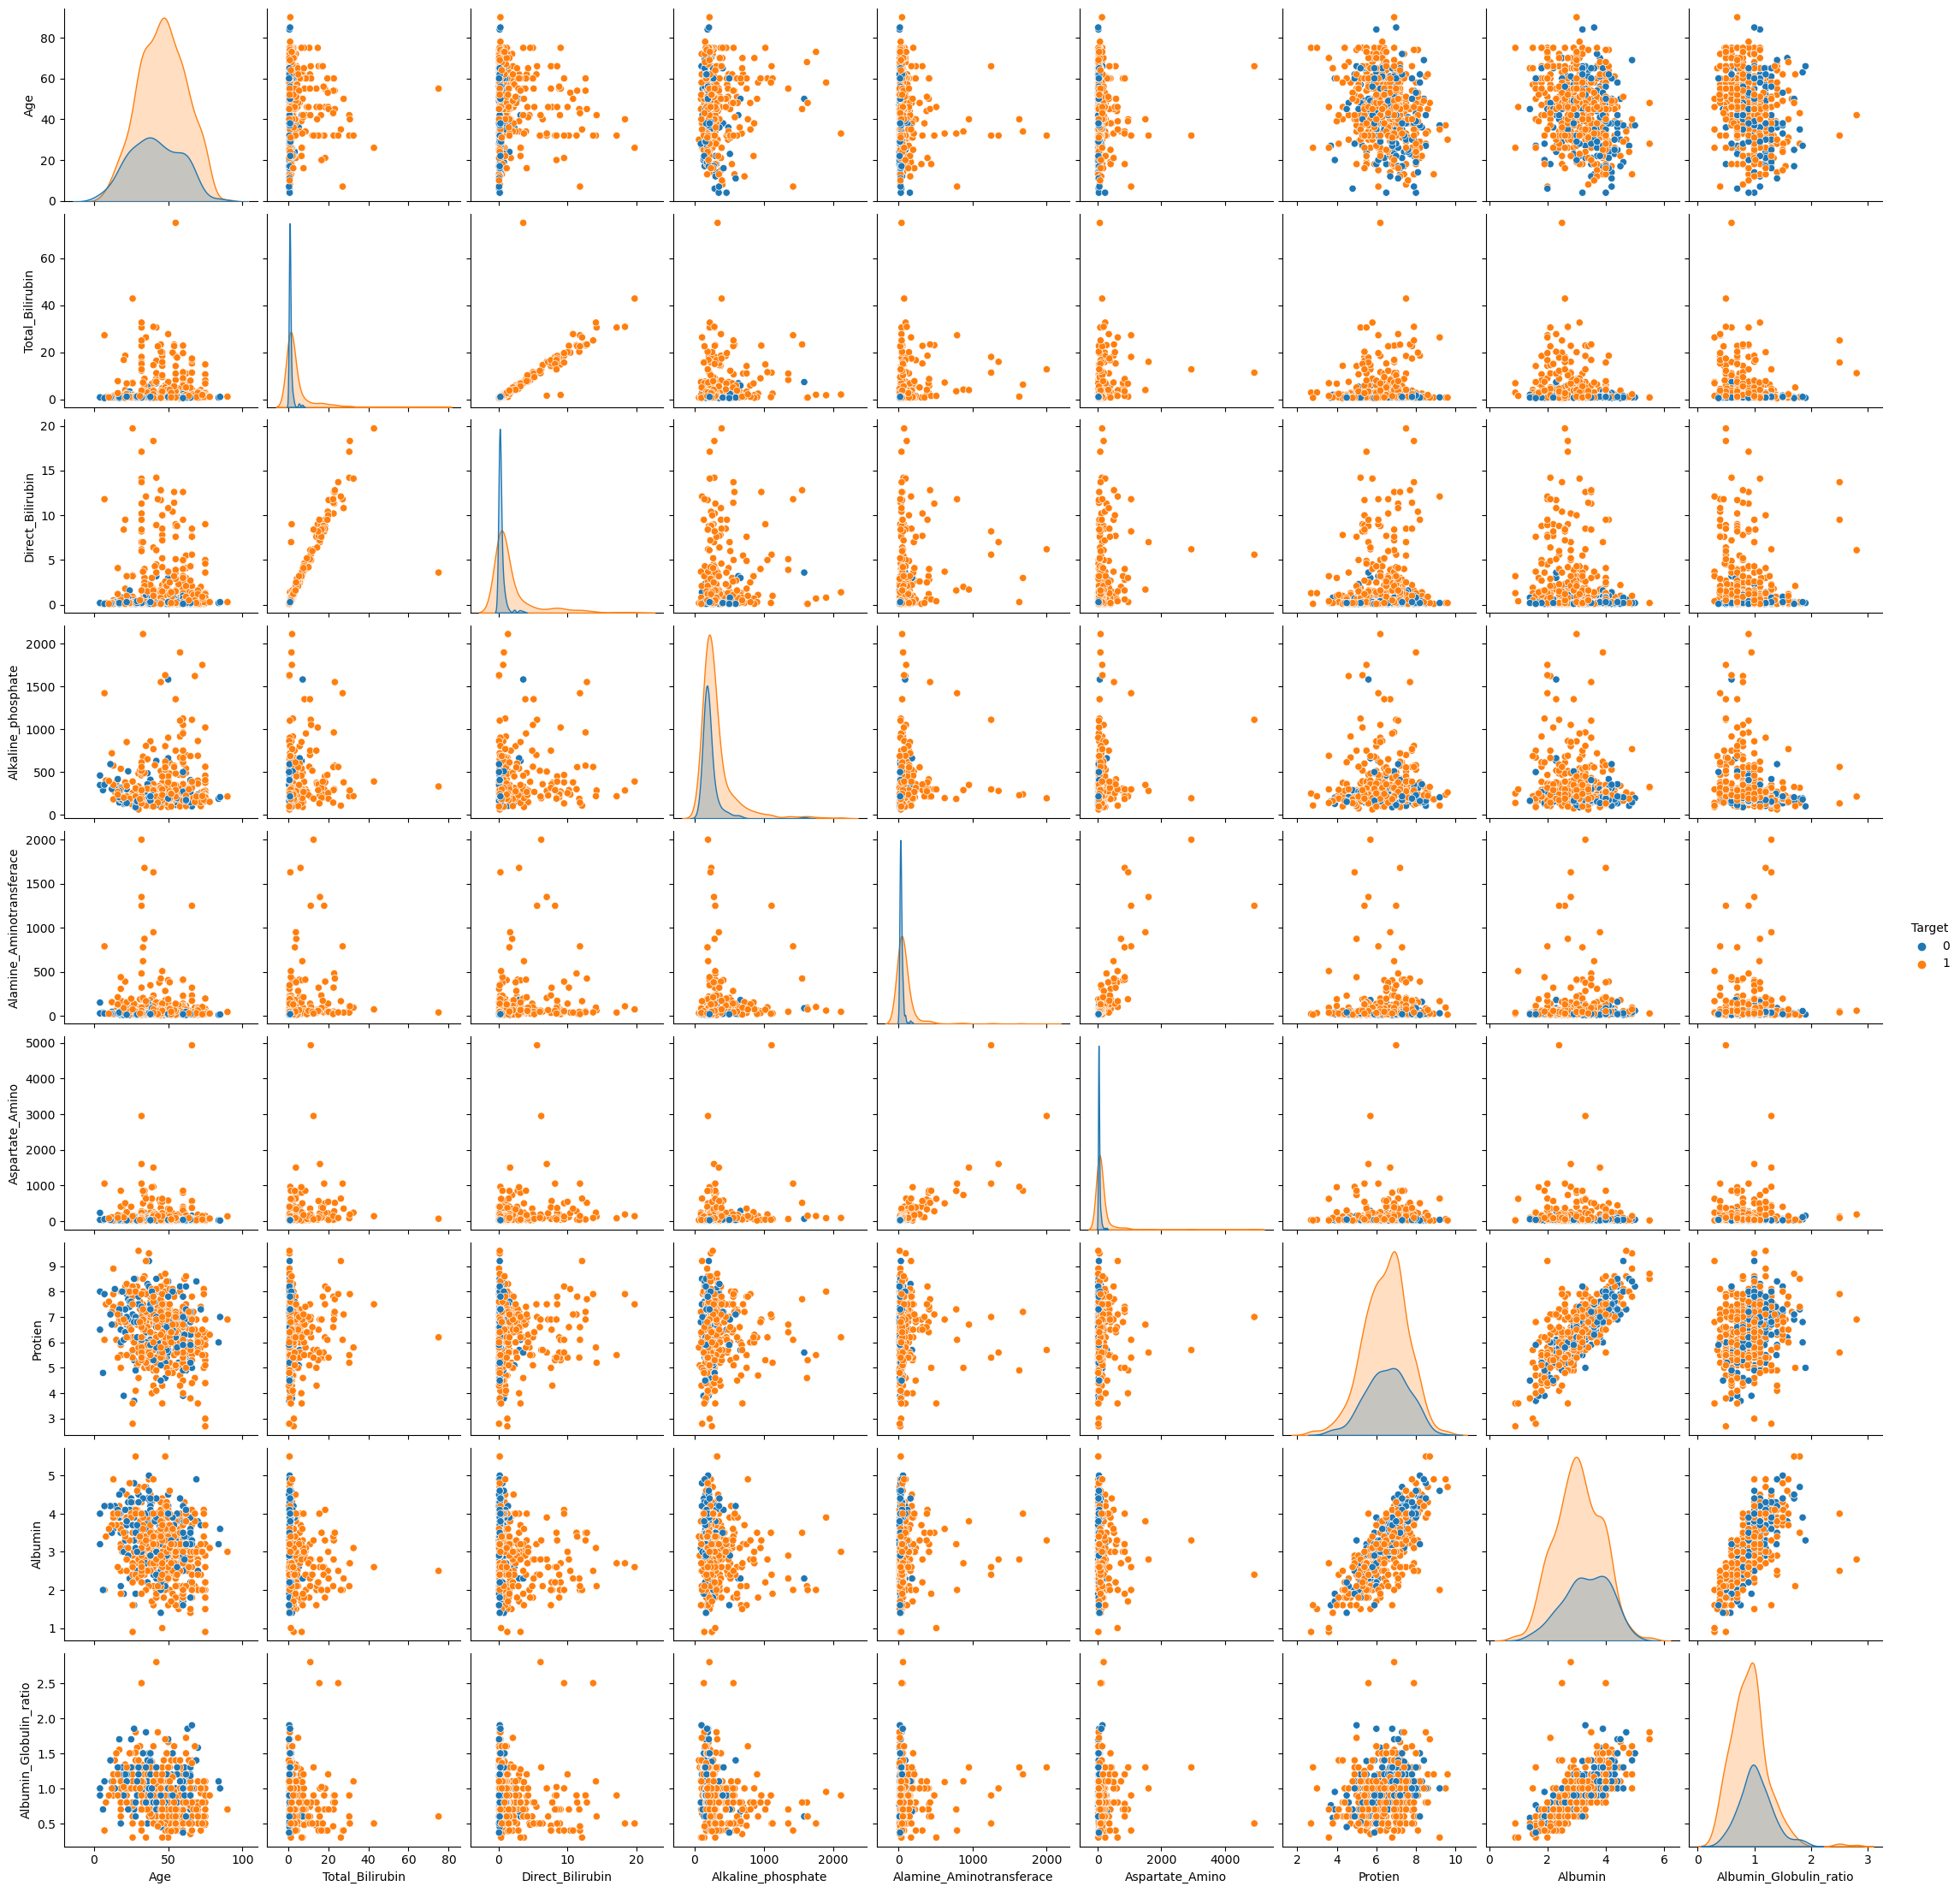

In [15]:
plt.figure(figsize=(40,40))                    # setting casnvas sige
sns.pairplot(data=data,hue='Target')           # to see the trend between each & every features
plt.show()

**Insights -**

           
               - There has no trend between Protien , Albumin , Albumin_Globulin_ratio to Age.

#  5 . Data Preprocessing

### i . Handle Missing Values

In [12]:
data.isnull().sum() # Check missing values

# 4 missing values in Albumin_Globulin_ratio     we can fill them by mean , median .

Age                         0
Gender                      0
Total_Bilirubin             0
Direct_Bilirubin            0
Alkaline_phosphate          0
Alamine_Aminotransferace    0
Aspartate_Amino             0
Protien                     0
Albumin                     0
Albumin_Globulin_ratio      4
Target                      0
dtype: int64

In [13]:
# fill missing values by median
data.loc[data['Albumin_Globulin_ratio'].isnull()==True,'Albumin_Globulin_ratio'] = data['Albumin_Globulin_ratio'].median()

In [14]:
# Again check missing values
data['Albumin_Globulin_ratio'].isnull().sum()

# so no more missing values

0

###  ii . Handle Categorical Data

In [15]:
data['Gender']=data['Gender'].map({'Male': 1, 'Female': 0})  # handle Gender manually

In [16]:
data.head()                                    # check data is Encoded or Not

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_phosphate,Alamine_Aminotransferace,Aspartate_Amino,Protien,Albumin,Albumin_Globulin_ratio,Target
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


###  iii . Handle Outlier

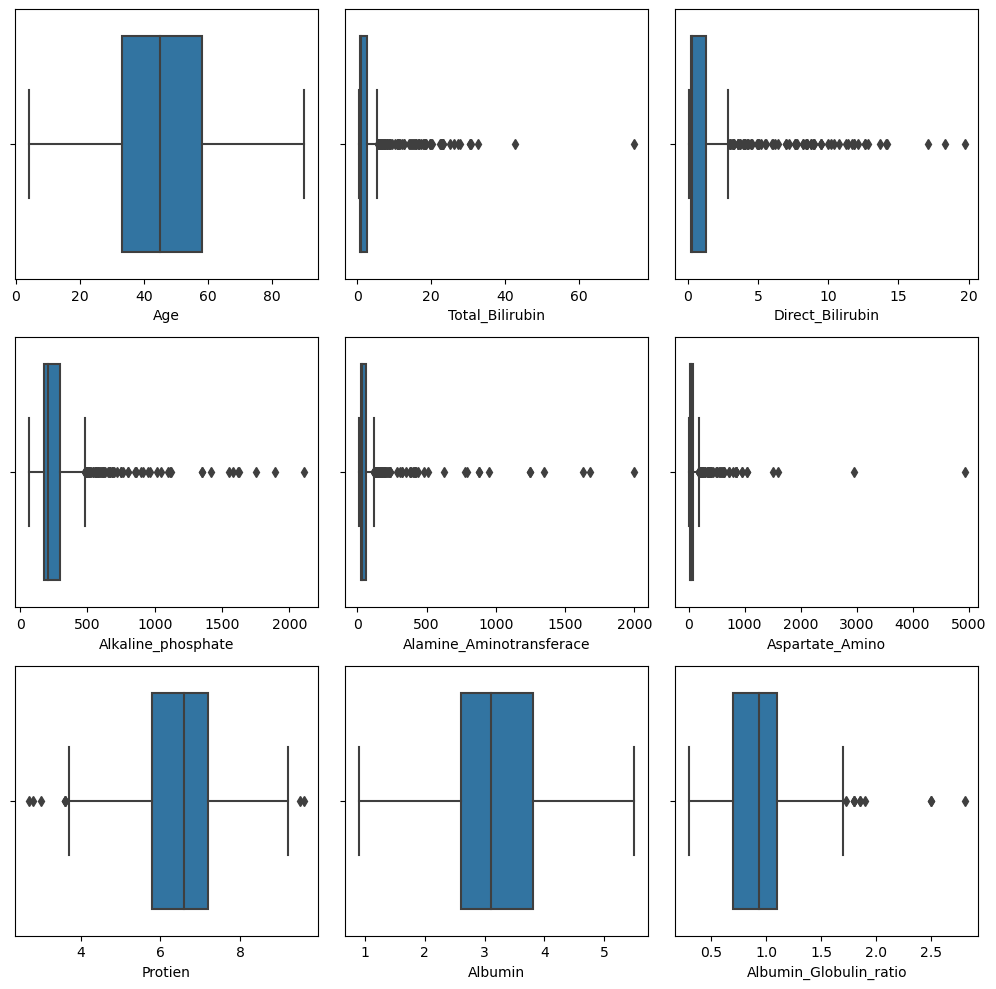

In [17]:
#  using for loop to checking outlier by ploting box plot.
plt.figure(figsize=(10,10))                         # setting canvas size
plotnumber = 1                                      # creating a variable
for i in data1:                                     # using for loop 
    plt.subplot(3,3,plotnumber)                     # setting no of rows and columns in which plot wii be plotted
    sns.boxplot(x=data[i])                          # using Box - plot to see outlier
    plotnumber = plotnumber + 1               
plt.tight_layout()                                  # to avoid overlapping of of plots

Insights - 
           - Total_Bilirubin , Direct_Bilirubin , Alkaline_phosphate , Alamine_Aminotransferace and Aspartate_Amino have more outlier  and the data points are far from mean as well as Upper Bound Limit.

In [18]:
# handle outlier by median

data.loc[data['Total_Bilirubin']>35,'Total_Bilirubin'] = data.Total_Bilirubin.median() 
data.loc[data['Direct_Bilirubin']>15,'Direct_Bilirubin'] = data.Direct_Bilirubin.median() 
data.loc[data['Alkaline_phosphate']>1200,'Alkaline_phosphate'] = data.Alkaline_phosphate.median() 
data.loc[data['Alamine_Aminotransferace']>600,'Alamine_Aminotransferace'] = data.Alamine_Aminotransferace.median()
data.loc[data['Aspartate_Amino']>1200,'Aspartate_Amino'] = data.Aspartate_Amino.median() 
data.loc[(data['Protien']<3.5) | (data['Protien']>9),'Protien'] = data.Protien.median()
data.loc[data['Albumin_Globulin_ratio']>2,'Albumin_Globulin_ratio'] = data.Albumin_Globulin_ratio.median()

### iv .  Data Transformation

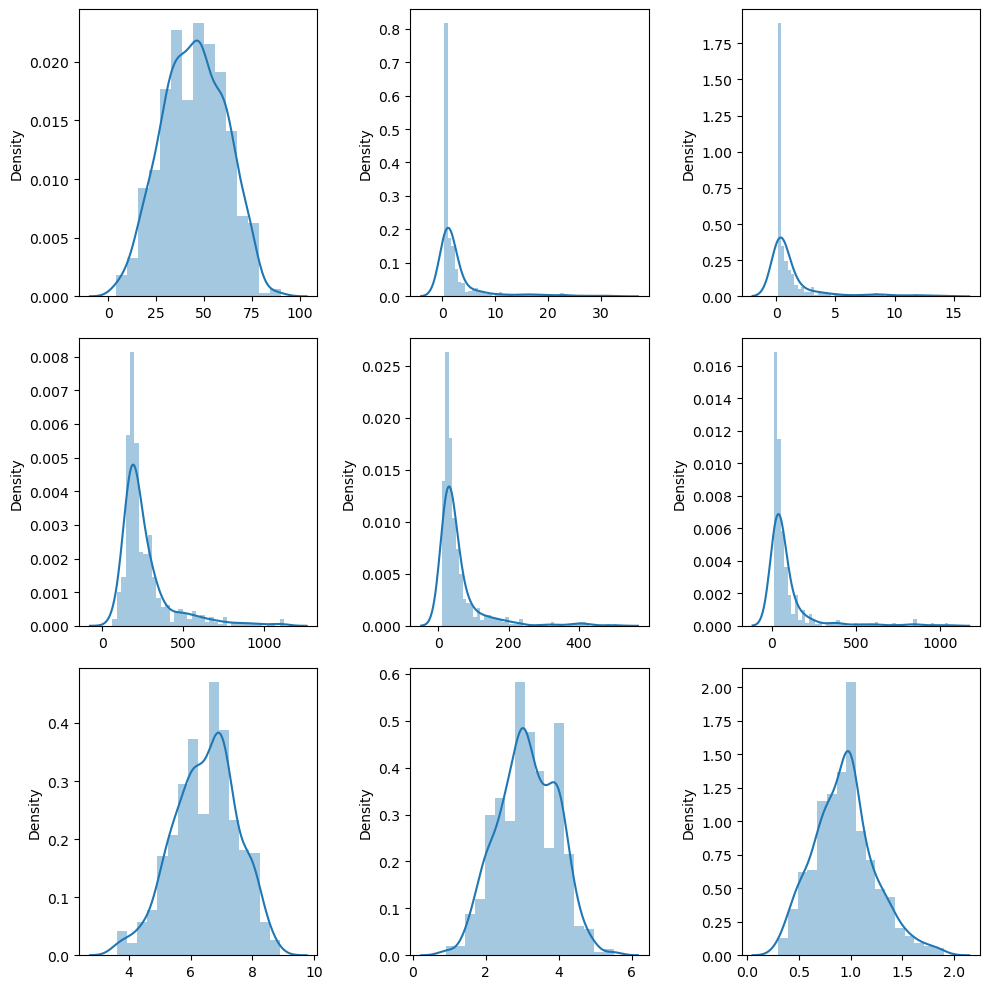

In [19]:
#  using for loop to checking Distribution by ploting dist plot.
plt.figure(figsize=(10,10))                         # setting canvas size
plotnumber = 1                                      # creating a variable
for i in data1:                                     # using for loop 
    plt.subplot(3,3,plotnumber)                     # setting no of rows and columns in which plot wii be plotted
    sns.distplot(x=data[i])                          # using  Distplot to see the Distribution
    plotnumber = plotnumber + 1               
plt.tight_layout()                                  # to avoid overlapping of of plots

In [20]:
# we clearly see that the data has more positive Skewness .
# transformed Skeweed Data
data["Total_Bilirubin"] = np.log(data["Total_Bilirubin"])  
data["Direct_Bilirubin"] = np.log(data["Direct_Bilirubin"])
data["Alkaline_phosphate"] = np.log(data["Alkaline_phosphate"])
data["Alamine_Aminotransferace"] = np.log(data["Alamine_Aminotransferace"])
data["Aspartate_Amino"] = np.log(data["Aspartate_Amino"])

In [21]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_phosphate,Alamine_Aminotransferace,Aspartate_Amino,Protien,Albumin,Albumin_Globulin_ratio,Target
0,65,0,-0.356675,-2.302585,5.231109,2.772589,2.890372,6.8,3.3,0.90,1
1,62,1,2.388763,1.704748,6.549651,4.158883,4.605170,7.5,3.2,0.74,1
2,62,1,1.987874,1.410987,6.194405,4.094345,4.219508,7.0,3.3,0.89,1
3,58,1,0.000000,-0.916291,5.204007,2.639057,2.995732,6.8,3.4,1.00,1
4,72,1,1.360977,0.693147,5.273000,3.295837,4.077537,7.3,2.4,0.40,1


### v . balancing Data 

In [22]:
  # count the Target class 
data['Target'].value_counts()     

## we can clearly say that tha data target class has not balanced , so we do it balance

1    416
0    167
Name: Target, dtype: int64

In [23]:
## data balancing using SMOTE technique

from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
smote = SMOTE() ## object creation

In [24]:
# create x and y variable
X_variable = data.drop('Target',axis=1)           #  Creating independent variable 
Y_variable = data['Target']                       # creat target variable

In [25]:
# Balance the dataset by Fitting this dependent & independent Feature
x_smote, y_smote = smote.fit_resample(X_variable, Y_variable)

In [26]:
# Print the shape of the original and resampled datasets
print("Original dataset shape:", X_variable.shape, Y_variable.shape)
print("Resampled dataset shape:", x_smote.shape, y_smote.shape)

Original dataset shape: (583, 10) (583,)
Resampled dataset shape: (832, 10) (832,)


In [27]:
# concatec this smote data into a new dataframe 
data = pd.concat([x_smote,y_smote],axis=1)    

In [28]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_phosphate,Alamine_Aminotransferace,Aspartate_Amino,Protien,Albumin,Albumin_Globulin_ratio,Target
0,65,0,-0.356675,-2.302585,5.231109,2.772589,2.890372,6.8,3.3,0.90,1
1,62,1,2.388763,1.704748,6.549651,4.158883,4.605170,7.5,3.2,0.74,1
2,62,1,1.987874,1.410987,6.194405,4.094345,4.219508,7.0,3.3,0.89,1
3,58,1,0.000000,-0.916291,5.204007,2.639057,2.995732,6.8,3.4,1.00,1
4,72,1,1.360977,0.693147,5.273000,3.295837,4.077537,7.3,2.4,0.40,1


#  6 . Feature Selection

### i . Check The Co - Relation

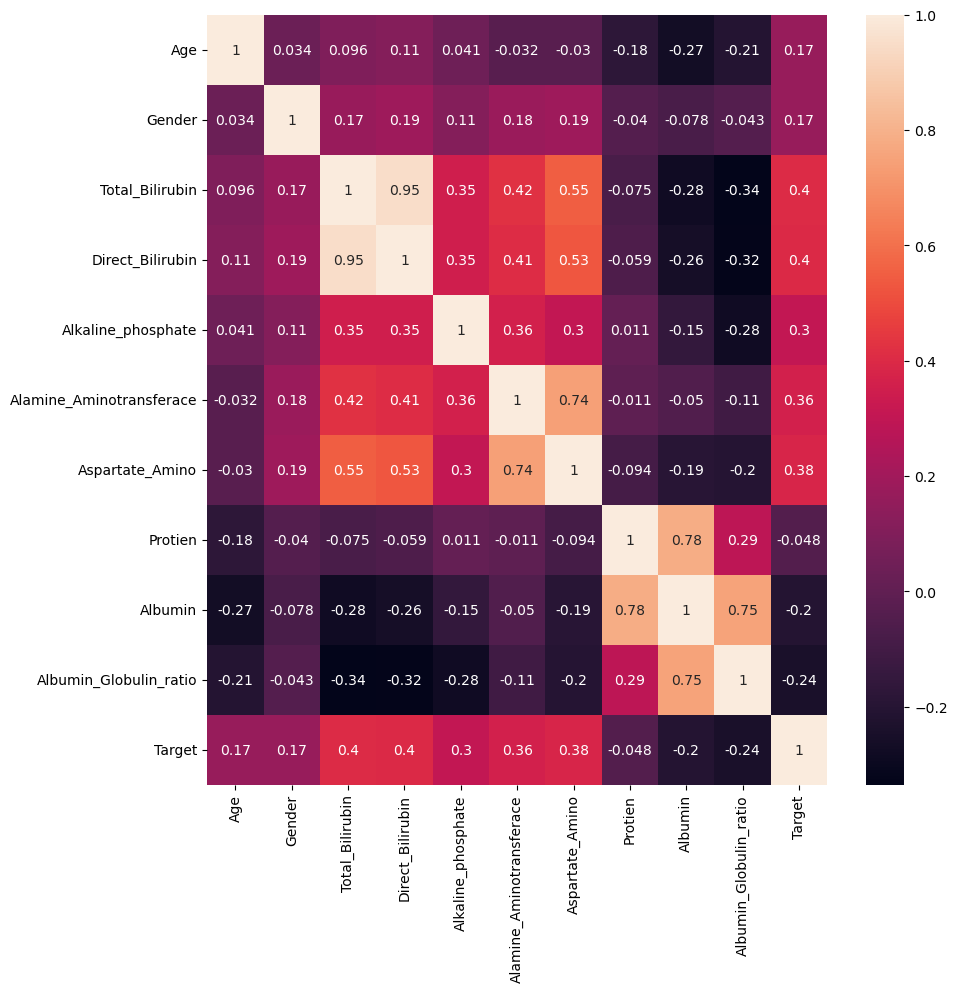

In [29]:
# check co-relation betweeen two numerical variable
plt.figure(figsize=(10,10))              # set the canvas size
sns.heatmap(data.corr(),annot=True)     # ploting heatmap to see correlation
plt.show()

# Here has  high corelation between Total_Bilirubin & Direct_Bilirubin

###  ii . Drop Duplicate Values

In [30]:
## checking the duplicate rows
data.duplicated().sum()

15

In [31]:
# Drop the duplicate values
data = data.drop_duplicates()

### iii . Dependent & Independent Variable 

In [32]:
# create x and y variable
x = data.drop(['Target','Direct_Bilirubin'],axis=1)           #  Creating independent variable
y = data['Target']                                            #  Create Target variable

In [33]:
# to see first 5 observation of Independent variable
x.head()  

,Age,Gender,Total_Bilirubin,Alkaline_phosphate,Alamine_Aminotransferace,Aspartate_Amino,Protien,Albumin,Albumin_Globulin_ratio
0,65,0,-0.356675,5.231109,2.772589,2.890372,6.8,3.3,0.90
1,62,1,2.388763,6.549651,4.158883,4.605170,7.5,3.2,0.74
2,62,1,1.987874,6.194405,4.094345,4.219508,7.0,3.3,0.89
3,58,1,0.000000,5.204007,2.639057,2.995732,6.8,3.4,1.00
4,72,1,1.360977,5.273000,3.295837,4.077537,7.3,2.4,0.40


In [34]:
 # check shape of  variable
print('Shape of x variable : ',x.shape )
print('Shape of y variable  : ',y.shape )

Shape of x variable :  (817, 9)
Shape of y variable  :  (817,)


#  7 . Model  Creation & Model Evaluation

In [37]:
# split the data into Train and Test

from sklearn.model_selection import train_test_split                                  # import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=31)   # spliot data into train & test

In [38]:
# import metrics 

from sklearn.metrics import accuracy_score,classification_report,recall_score,precision_score,f1_score

# ( a ) .  Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression   # import Logistic Regression from Sckit - learn Library
LR = LogisticRegression()                             # create Logistic regression Variable

LR.fit(x_train,y_train)                               # Fitting the model

LogisticRegression()

In [40]:
y_pr_LR = LR.predict(x_test)                          # predict the Target
y_pr_LR                                               # print prediction values

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0], dtype=int64)

In [41]:
y_test.values                                   # see the Y_test values to compare

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0], dtype=int64)

In [42]:
# print Accuracy Score for testing Data
acc_lr = accuracy_score(y_test,y_pr_LR)                      
print("Accuracy Of Linear Regression : ",acc_lr)

Accuracy Of Linear Regression :  0.7886178861788617


In [43]:
# print Recall Score 
Recal_LR = recall_score(y_test,y_pr_LR)                      
print("Recal  Of Linear Regression : ",Recal_LR)

Recal  Of Linear Regression :  0.746031746031746


In [44]:
# print precision Score 
prec_LR = precision_score(y_test,y_pr_LR)                      
print("precision  Of Linear Regression : ",prec_LR)

precision  Of Linear Regression :  0.8245614035087719


In [45]:
# print F1 Score 
f1_LR = f1_score(y_test,y_pr_LR)                      
print("F1 score  Of Linear Regression : ",f1_LR)

F1 score  Of Linear Regression :  0.7833333333333334


In [46]:
# print Accuracy Score for Training Data
y_pr_tr=LR.predict(x_train)
acc_lr_trin = accuracy_score(y_train,y_pr_tr)
acc_lr_trin

0.712784588441331

In [47]:
print(classification_report(y_test,y_pr_LR))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       120
           1       0.82      0.75      0.78       126

    accuracy                           0.79       246
   macro avg       0.79      0.79      0.79       246
weighted avg       0.79      0.79      0.79       246



#  ( b ) . K_Nearest_Neighbour ( KNN )

In [48]:
from sklearn.neighbors import KNeighborsClassifier                 # from scikit-learn import KNeighborsClassifier

## taking optimal k to determine how many nearest neighbors  to create

# create a list to store the error values for each k
error_rate = []

# Will take some time
for i in range(1,11):    # start of loop from 1- to 10
    knn = KNeighborsClassifier(n_neighbors=i)   # object creation
    knn.fit(x_train,y_train)    # x_train for distance   And y_train used for getting estimate from neighbour
    pred_i = knn.predict(x_test)  # obtain estimates for i neighbours
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

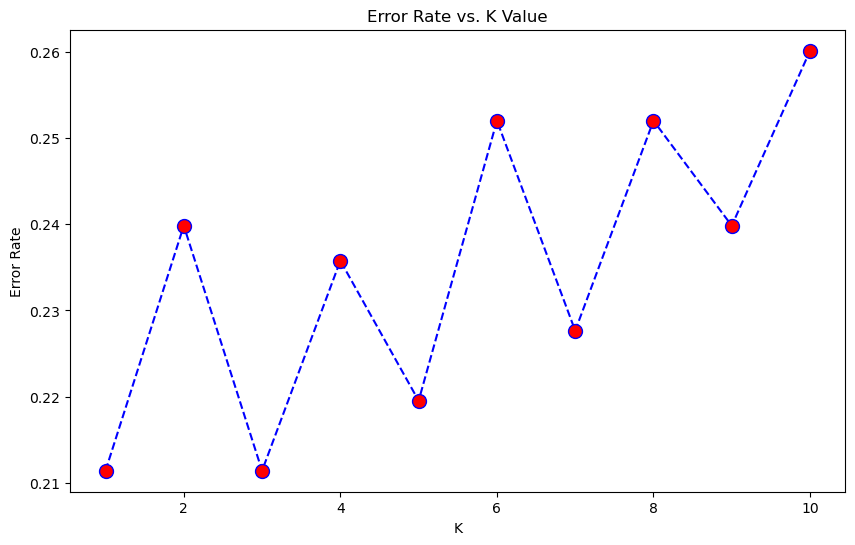

In [49]:
# Lets plot the k-value and error rate

plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [50]:
Knn = KNeighborsClassifier(n_neighbors=5)                          # make a variable for KNeighborsClassifier
Knn.fit(x_train,y_train)                                           # FIT THE MODEL
y_pr_Knn = Knn.predict(x_test)                                     # predict the x_test values

In [51]:
# print Accuracy for KNN for Testing data
acc_knn = accuracy_score(y_test,y_pr_Knn)
print("Accuracy score for KNN : ",acc_knn)

Accuracy score for KNN :  0.7804878048780488


In [52]:
# print Classification Report for KNN
C_Report_Knn = classification_report(y_test,y_pr_Knn)
print("Classification Report for KNN : ","\n",C_Report_Knn)

Classification Report for KNN :  
               precision    recall  f1-score   support

           0       0.71      0.93      0.80       120
           1       0.90      0.64      0.75       126

    accuracy                           0.78       246
   macro avg       0.81      0.78      0.78       246
weighted avg       0.81      0.78      0.78       246



## --  Hyperparameter Tuning for KNN --

In [53]:
from sklearn.model_selection import GridSearchCV    # import Grid Search cv from Sklearn.model_selevction

In [54]:
# Hyperparameter Tuning defining
hyperpara = [{'n_neighbors':[2,3,4,5,6,7,8,9,10],'weights':['distance','uniform']}]   # define n_neighbors & weights values
grid = GridSearchCV(estimator = KNeighborsClassifier(),param_grid = hyperpara,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)                     # fit the model

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['distance', 'uniform']}],
             scoring='accuracy')

In [55]:
grid.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [56]:
Knn_smote = KNeighborsClassifier(n_neighbors=5,weights="distance")    # make a variable for KNeighborsClassifier
Knn_smote.fit(x_train,y_train)                            # fit the model
Y_prd_knn_hyp = grid.predict(x_test)

In [57]:
acc_knn_hyp = accuracy_score(y_test,Y_prd_knn_hyp)   # finding accuracy
acc_knn_hyp

0.8008130081300813

# ( c ) . Support Vector Machine

In [58]:
from sklearn.svm import SVC                                      # import support vector classifier from sklearn
svc = SVC()                                                      # make variable of svc
svc.fit(x_train,y_train)                    # fit model
y_pr_svc = svc.predict(x_test)              #  predicr x_test

In [59]:
acc_svm = accuracy_score(y_test,y_pr_svc)    # print Accuracy
acc_svm

0.6260162601626016

In [60]:
print(classification_report(y_test,y_pr_svc))

              precision    recall  f1-score   support

           0       0.61      0.64      0.63       120
           1       0.64      0.61      0.63       126

    accuracy                           0.63       246
   macro avg       0.63      0.63      0.63       246
weighted avg       0.63      0.63      0.63       246



## -- Hyperparameter for SVM --

In [61]:
svm_hyp = SVC(C= 1, gamma= 1, kernel= 'rbf')      # call the  model with best hyperparameter
svm_hyp.fit(x_train,y_train)                       # fit the  model with best hyperparameter
y_pr_svc_hyp = svm_hyp.predict(x_test)                 # predict value of y
acc_svm_hyp = accuracy_score(y_test,y_pr_svc_hyp)                 # print accuracy
acc_svm_hyp

0.8577235772357723

# ( d ) . Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier     # import DecisionTreeClassifier
Dtree = DecisionTreeClassifier()                    # make a variable of DecisionTreeClassifier
Dtree.fit(x_train,y_train)                          # fit DecisionTreeClassifier
y_pr_tree = Dtree.predict(x_test)                   # predict target value

In [63]:
# print Accuracy for testing data of DecisionTree
acc_dtree = accuracy_score(y_test,y_pr_tree)
acc_dtree

0.7479674796747967

In [64]:
print(classification_report(y_test,y_pr_tree))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75       120
           1       0.77      0.72      0.75       126

    accuracy                           0.75       246
   macro avg       0.75      0.75      0.75       246
weighted avg       0.75      0.75      0.75       246



## -- Hyperparameter of Decision Tree  --

In [65]:

#creating dictionary--> key value pair of hyperparameters having key as parameter and values as its values
params = {
    "criterion":("gini", "entropy"),     #quality of split
    "splitter":("best", "random"),       # searches the features for a split
    "max_depth":(list(range(1, 20))),    #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],       #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}


tree_clf = DecisionTreeClassifier()             #object creation for decision tree
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3) # Define Grid search 



tree_cv.fit(x_train,y_train)                     #training data on gridsearch cv
best_params = tree_cv.best_params_               #it will give you best parameters 
print(f"Best paramters: {best_params})")         #printing  best parameters


Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'random'})


In [66]:
tree_cv.best_estimator_        #getting best score form cv

DecisionTreeClassifier(max_depth=14, min_samples_split=3, splitter='random')

In [67]:
tree_cv.best_score_

0.7268669054836043

In [68]:
#passing best parameter to decision tree
dt1=DecisionTreeClassifier(criterion='gini',max_depth=14,min_samples_leaf= 1,
                           min_samples_split=3,splitter='random',random_state=3)

In [69]:
dt1.fit(x_train,y_train)                         #traing model with best parameter

DecisionTreeClassifier(max_depth=14, min_samples_split=3, random_state=3,
                       splitter='random')

In [70]:
y_hat1=dt1.predict(x_test)                          # predicting target
acc_dtree_hyp=accuracy_score(y_test,y_hat1)         #checking accuracy for testing data
acc_dtree_hyp

0.7235772357723578

In [71]:
print(classification_report(y_test,y_hat1))

              precision    recall  f1-score   support

           0       0.69      0.79      0.74       120
           1       0.77      0.66      0.71       126

    accuracy                           0.72       246
   macro avg       0.73      0.73      0.72       246
weighted avg       0.73      0.72      0.72       246



# ( e ) .  Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier   # import random forest classifier
r_forest = RandomForestClassifier()                   # make variable of random forest Classifier
r_forest.fit(x_train,y_train)                         # fit data in Random forest 

RandomForestClassifier()

In [73]:
y_pr_rfor = r_forest.predict(x_test)                  # predict target
acc_randomf = accuracy_score(y_test,y_pr_rfor)        # calculate Accuracy
acc_randomf

0.8292682926829268

## Hyper parameter for random forest

In [74]:

from sklearn.model_selection import RandomizedSearchCV    # import random search 

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]  # List Comprehension-using for loop in list
max_features = ['auto', 'sqrt']                          # maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]                  # List Comprehension-using for loop in list
max_depth.append(None)
min_samples_split = [2, 5, 10]               # minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]                 # minimum number of samples required to be at a leaf node.
bootstrap = [True, False]                    # sampling 

# dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)     # model creating 

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='accuracy',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)


rf_cv.fit(x_train, y_train)                    ## training data on randomsearch cv
rf_best_params = rf_cv.best_params_            ## it will give you best parameters 
print(f"Best paramters: {rf_best_params})")    ## printing  best parameters
 


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': True})


In [75]:
rf_cv.best_score_                                # print best score

0.7601083861486174

In [76]:
# passing best parameter to randomforest
rf_clf2 = RandomForestClassifier(n_estimators = 800,min_samples_split = 2, 
                                 min_samples_leaf = 1, max_features = 'auto', max_depth = 100, bootstrap =  True)

rf_clf2.fit(x_train, y_train)        # fit model 
y_predict=rf_clf2.predict(x_test)    # testing

In [77]:
# print Accuracy
acc_randomf_hyp = accuracy_score(y_test,y_predict)
acc_randomf_hyp

0.8414634146341463

# ( f ) . Gradient - BOOST

In [78]:
from sklearn.ensemble import GradientBoostingClassifier      # import GradientBoostingClassifier
Gbc = GradientBoostingClassifier()                           # create a variable of GradientBoostingClassifier
Gbc.fit(x_train,y_train)                                     # fit Gradient Boosting Classifier

GradientBoostingClassifier()

In [79]:
y_pr_Gbc = Gbc.predict(x_test)                               # predict target in GradientBoostingClassifier
acc_gboost = accuracy_score(y_test,y_pr_Gbc)                 # print Accuracy
acc_gboost 

0.7764227642276422

#  ( g ) . XG - Boost

In [80]:
#!pip install xgboost                # for use of XG - Boost we need to install in our Note book.

In [81]:
## model creation
from xgboost import XGBClassifier                 # importing the model library
xgb=XGBClassifier()                                ## object creation
xgb.fit(x_train,y_train)                           # fitting the data
y_pr_xgb=xgb.predict(x_test)                       #predicting the price

acc_xgboost = accuracy_score(y_test,y_pr_xgb)      # Print Accuracy
acc_xgboost

0.8130081300813008

## -- hyperparameter for XG - Boost --

In [82]:
# import RandomizedSearchCV for Hyperparameter
from sklearn.model_selection import RandomizedSearchCV
# define Parameter range 
param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}
# define XGBClassifier
XGB=XGBClassifier(random_state=42,verbosity=0,silent=0)   
rcv= RandomizedSearchCV(estimator=XGB, scoring='accuracy',param_distributions=param_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

rcv.fit(x_train, y_train)             ## training data on randomsearch cv
cv_best_params = rcv.best_params_     ## it will give you best parameters 
print(f"Best paramters: {cv_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'reg_lambda': 0.4, 'reg_alpha': 1.6, 'n_estimators': 130, 'max_depth': 8, 'learning_rate': 0.2, 'gamma': 0.4})


In [83]:
rcv.best_score_

0.756526132084137

In [84]:
# fit the model with Best Hyperparameter
XGB2=XGBClassifier(reg_lambda= 0.4, reg_alpha= 1.6, n_estimators=130, max_depth=8, learning_rate=0.2, gamma=0.4,random_state=42)
XGB2.fit(x_train, y_train)          # training or fit the model
y_predict=XGB2.predict(x_test)      # predict target
acc_xgboost_hyp=accuracy_score(y_predict,y_test)     # checking performance
acc_xgboost_hyp

0.7804878048780488

# ( h ) .  Artificial Neural Network

In [104]:
## model creation
from sklearn.neural_network import MLPClassifier      # import Neural network
ann = MLPClassifier( hidden_layer_sizes=(150,2),
                       learning_rate_init=0.001,
                       max_iter=200,
                       random_state=0)                ## model object creation max_iter=Stopping parameter
ann.fit(x_train,y_train)                            ## training the data

y_predict = ann.predict(x_test)                     ## predict target

acc_ann = accuracy_score(y_test,y_predict)            ## Check performance
acc_ann 

0.7804878048780488

## ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- ##

#  ----- Results -----

In [105]:
Results = pd.DataFrame({'model':['Log_Regression','K_nearest','Support vector','Decision tree',
                          'Random Forest','Gradient Boost','XG - Boost','Artificial Network'],
              
              
             'Test Accuracy':[acc_lr,acc_knn,acc_svm,acc_dtree,acc_randomf,acc_gboost,acc_xgboost,acc_ann],
              
             'HyperParameter':['not available',acc_knn_hyp,acc_svm_hyp,acc_dtree_hyp,
                               'not available','not available',acc_xgboost_hyp,'not available'],
              
              'F1  score':[f1_score(y_test,y_pr_LR),f1_score(y_test,y_pr_Knn),f1_score(y_test,y_pr_svc),
                          f1_score(y_test,y_pr_tree),f1_score(y_test,y_pr_rfor),f1_score(y_test,y_pr_Gbc),
                          f1_score(y_test,y_pr_xgb),f1_score(y_test,y_predict)]
             })



In [106]:
Results


,model,Test Accuracy,HyperParameter,F1 score
0,Log_Regression,0.788618,not available,0.783333
1,K_nearest,0.780488,0.800813,0.750000
2,Support vector,0.626016,0.857724,0.626016
3,Decision tree,0.747967,0.723577,0.745902
4,Random Forest,0.829268,not available,0.825000
5,Gradient Boost,0.776423,not available,0.780876
6,XG - Boost,0.813008,0.780488,0.816000
7,Artificial Network,0.780488,not available,0.787402


# Data Analysis Report

# Process

# ----- Data Analysis Report -----

# ----- CONCLUSION -----

The **Random Forest** model achieved the highest test accuracy **(82.93%)** among all models, followed closely by XGBoost with a test accuracy of 81.30%. The Random Forest model also had the highest **F1 score (82.50%)**, indicating its overall **good performance** in terms of precision and recall. Logistic Regression, Decision Tree, and Gradient Boosting also performed reasonably well with F1 scores above 74 .

So that why i am prefering Random forest . 